#### Instala√ß√£o das bibliotecas

In [1]:
!pip install nltk

In [2]:
!pip install TextBlob

In [3]:
!pip install tqdm

In [52]:
!pip install seaborn

#### Importa√ß√£o das bibliotecas a serem utilizadas para o processamento

In [86]:
import pandas as pd
import numpy as np
from keras.layers import Dropout
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import  RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf 
import joblib
from warnings import simplefilter

import re
import matplotlib.pyplot as plt
from textblob import TextBlob

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

from tqdm import tqdm

import seaborn as sns


simplefilter("ignore")

np.random.seed(0)

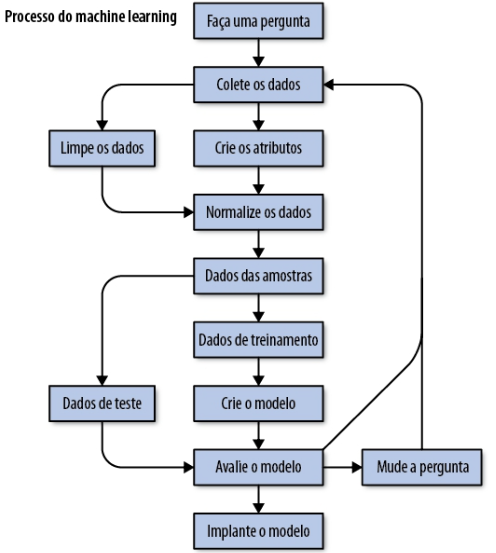

In [2]:
from IPython.display import Image
from IPython.core.display import HTML

PATH = "/Users/Maicon Santos/modelos_teste/"
Image(filename = PATH + "modelML.png", width=500, height=100)

#### Hipotese

A primeira parte √© consumir o dataset neste link e gerar conhecimento sobre o perfil de quem est√° falando do bitcoin.

A segunda parte consiste em realizar uma an√°lise de sentimentos dos tweets do dataset, para saber se as pessoas possuem uma percep√ß√£o negativa ou positiva sobre a criptomoeda.

Link Base: https://www.kaggle.com/datasets/226bc93769b5b28697eb8fc4a107040b3145c01640c91c16bde8424170f2820e

#### Coleta dos Dados

In [3]:
df = pd.read_csv('Bitcoin_tweets.csv')

#### Pr√©-Processamento, Limpeza dos Dados

In [4]:
df.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier üá¶üáπüá∏üá™ #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  üòé BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers user_friends user_favourites user_verified  \
0          8534.0         7605            4838         False   
1          6769.0         1532           25483         False   
2           128.0          332             924         False   
3           625.0          129              14         False   
4          1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  üòé Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                        NaN      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


#### Foi realizado a verifica√ß√£o dos valores nulos.

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum() / df.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total de Nulos', '%'])
missing_data = missing_data.sort_values(by=['Total de Nulos'], ascending=False)
missing_data

Total de Nulos      %
user_location            1261627  49.03
user_description          318865  12.39
hashtags                   17263   0.67
source                      3845   0.15
is_retweet                   531   0.02
user_followers               225   0.01
user_friends                 225   0.01
user_favourites              225   0.01
user_verified                225   0.01
date                         225   0.01
text                         225   0.01
user_created                 178   0.01
user_name                     31   0.00

#### Foi realizado a exclus√£o das colunas.

##### 'user_name', 'is_retweet','user_friends','user_favourites', 'hashtags'

In [7]:
columns = ['user_name', 'is_retweet','user_friends','user_favourites', 'hashtags']

df_new = df.drop(columns, axis=1)

In [8]:
df_new.head()

user_location                                   user_description  \
0      Atlanta, GA  Biz Consultant, real estate, fintech, startups...   
1              NaN  üòé BITCOINLIVE is a Dutch platform aimed at inf...   
2  London, England  IM Academy : The best #forex, #SelfEducation, ...   
3              NaN  I will post a lot of buying signals for BTC tr...   
4           Europa  Co-founder @RENJERJerky | Forbes 30Under30 | I...   

          user_created  user_followers user_verified                 date  \
0  2009-04-26 20:05:09          8534.0         False  2021-02-10 23:59:04   
1  2019-10-17 20:12:10          6769.0         False  2021-02-10 23:58:48   
2  2014-11-10 10:50:37           128.0         False  2021-02-10 23:54:48   
3  2019-09-28 16:48:12           625.0         False  2021-02-10 23:54:33   
4  2016-02-03 13:15:55          1249.0         False  2021-02-10 23:54:06   

                                                text               source  
0  Blue Ridge Bank shares halted by NYSE after #b...      Twitter Web App  
1  üòé Today, that's this #Thursday, we will do a "...  Twitter for Android  
2  Guys evening, I have read this article about B...      Twitter Web App  
3  $BTC A big chance in a billion! Price: \487264...              dlvr.it  
4  This network is secured by 9 508 nodes as of t...      Twitter Web App

#### A convers√£o da variavel data para datetime

In [9]:
df_new["date"] = pd.to_datetime(df_new["date"],errors='coerce')
df_new["date"] = df_new["date"].apply(lambda x: x.date() )

#### Exclus√£o dos dados duplicados

In [10]:
df_new = df_new.drop_duplicates()

#### Na localidade foi substituido o valor Nan, por global

In [11]:
df_new['user_location'] = df_new['user_location'].replace(np.nan, 'Global', regex=True)

In [12]:
df_new

user_location                                   user_description  \
0            Atlanta, GA  Biz Consultant, real estate, fintech, startups...   
1                 Global  üòé BITCOINLIVE is a Dutch platform aimed at inf...   
2        London, England  IM Academy : The best #forex, #SelfEducation, ...   
3                 Global  I will post a lot of buying signals for BTC tr...   
4                 Europa  Co-founder @RENJERJerky | Forbes 30Under30 | I...   
...                  ...                                                ...   
2573250           Global  There's a new social order aligning.  This is ...   
2573251             Kƒ∞EV  Bƒ∞TC0ƒ∞N\n\nCAN U SEND Gƒ∞FT PLS F0R WAR :(\n\nI...   
2573252           Global  OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...   
2573253           Global                                 ü§ñ #crypto #trading   
2573254           Global  payla≈üƒ±mlar yatƒ±rƒ±m tavsiyesi deƒüildir\n\nsoru...   

                user_created  user_followers user_verified        date  \
0        2009-04-26 20:05:09          8534.0         False  2021-02-10   
1        2019-10-17 20:12:10          6769.0         False  2021-02-10   
2        2014-11-10 10:50:37           128.0         False  2021-02-10   
3        2019-09-28 16:48:12           625.0         False  2021-02-10   
4        2016-02-03 13:15:55          1249.0         False  2021-02-10   
...                      ...             ...           ...         ...   
2573250  2021-03-06 13:47:42            50.0         False  2022-03-14   
2573251  2022-03-14 19:29:12             0.0         False  2022-03-14   
2573252  2021-08-29 04:38:25          2105.0         False  2022-03-14   
2573253  2017-09-22 10:00:27           420.0         False  2022-03-14   
2573254  2022-03-05 13:17:16            54.0         False  2022-03-14   

                                                      text  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        üòé Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
2573250  This should tell you plenty.  DO NOT hold pape...   
2573251  TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...   
2573252  #TOP01 LOSSER LIST TODAY 14/03/22 üì¢\n\n#IMX/US...   
2573253    I am the only crazy person here? \n\n#btc #alts   
2573254  #BUNƒ∞ \nThis coin is solid as a bone, to new h...   

                      source  
0            Twitter Web App  
1        Twitter for Android  
2            Twitter Web App  
3                    dlvr.it  
4            Twitter Web App  
...                      ...  
2573250  Twitter for Android  
2573251      Twitter Web App  
2573252   Twitter for iPhone  
2573253   Twitter for iPhone  
2573254  Twitter for Android  

[2573010 rows x 8 columns]

#### A convers√£o da variavel user_created para datetime

In [13]:
df_new["user_created"] = pd.to_datetime(df_new["user_created"],errors='coerce')
df_new["user_created"] = df_new["user_created"].apply(lambda x: x.date() )

In [14]:
df_new['user_followers'] = df_new['user_followers'].astype(int, errors='ignore')

In [15]:
df_new.head()

user_location                                   user_description  \
0      Atlanta, GA  Biz Consultant, real estate, fintech, startups...   
1           Global  üòé BITCOINLIVE is a Dutch platform aimed at inf...   
2  London, England  IM Academy : The best #forex, #SelfEducation, ...   
3           Global  I will post a lot of buying signals for BTC tr...   
4           Europa  Co-founder @RENJERJerky | Forbes 30Under30 | I...   

  user_created  user_followers user_verified        date  \
0   2009-04-26          8534.0         False  2021-02-10   
1   2019-10-17          6769.0         False  2021-02-10   
2   2014-11-10           128.0         False  2021-02-10   
3   2019-09-28           625.0         False  2021-02-10   
4   2016-02-03          1249.0         False  2021-02-10   

                                                text               source  
0  Blue Ridge Bank shares halted by NYSE after #b...      Twitter Web App  
1  üòé Today, that's this #Thursday, we will do a "...  Twitter for Android  
2  Guys evening, I have read this article about B...      Twitter Web App  
3  $BTC A big chance in a billion! Price: \487264...              dlvr.it  
4  This network is secured by 9 508 nodes as of t...      Twitter Web App

In [16]:
df_new['source'].value_counts()

Twitter for Android          768927
Twitter Web App              667046
Twitter for iPhone           499638
IFTTT                         38458
dlvr.it                       31030
                              ...  
Twitter Search Terms              1
ganuooh                           1
Reacti's tweetdeck                1
erased22226555_ocq7EaOEIF         1
TwitterGeoBotLLJK                 1
Name: source, Length: 1986, dtype: int64

#### Foi selecionado os dados em que foi usado esses valores ('Twitter Web App', 'Twitter for Android', 'Twitter for iPhone')
#### Por ter uma maior representatividade nos dados.

In [17]:
sources = ['Twitter Web App', 'Twitter for Android', 'Twitter for iPhone']
df_new_ = df_new[df_new.source.isin(sources)]

In [18]:
df_new_.source.value_counts()

Twitter for Android    768927
Twitter Web App        667046
Twitter for iPhone     499638
Name: source, dtype: int64

In [19]:
df_new_['user_location'].value_counts()

Global                           977467
United States                     26493
New York, USA                     11887
London, England                   10642
India                              9826
                                  ...  
Hazyview, South Africa                1
Best city in the world... YYC         1
Fishers, IN                           1
Que mas da                            1
enugu state                           1
Name: user_location, Length: 66318, dtype: int64

In [20]:
result_source = df_new_['source'].value_counts()

#### Com todas as localidade no mundo, em que foi adquirido os dados, √© poss√≠vel perceber que a maior men√ß√£o de twitter em bitcoin, foi em celulares android, em segundo lugar foi no uso na Web APP e por √∫ltimo em celulares IPhones.

<AxesSubplot:>

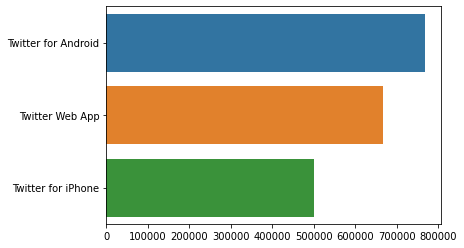

In [21]:
sns.barplot(y=result_source.index, x=result_source.values)

In [22]:
#df_new_[(df_new_['user_location'].value_counts() >= 1000) & (df_new_['user_location'].value_counts() < 977467)]
#(df_new_.value_counts()[(df_new_['user_location'].value_counts() >= 1000) & (df_new2['counts'] < 531170)]).reset_index(drop=True)
result_source_location = df_new_['user_location'].value_counts()[(df_new_['user_location'].value_counts() > 5000) & (df_new_['user_location'].value_counts() < 977467)]

#df_new_['user_location'].value_counts()[(df_new_['user_location'].value_counts() > 1000) & (df_new_['user_location'].value_counts() < 977467)]

#### Retirando a localidade global, em que pode ser em qualquer local do mundo, o pa√≠s que teve mais men√ß√µes de bitcoin, foi nos USA e os seus estados, em segundo lugar, podemos perceber nos dados e na figura abaixo, em que o pa√≠s da India e como tamb√©m o reino unido, teve uma grande men√ß√£o significativa em bitcoin.

<AxesSubplot:>

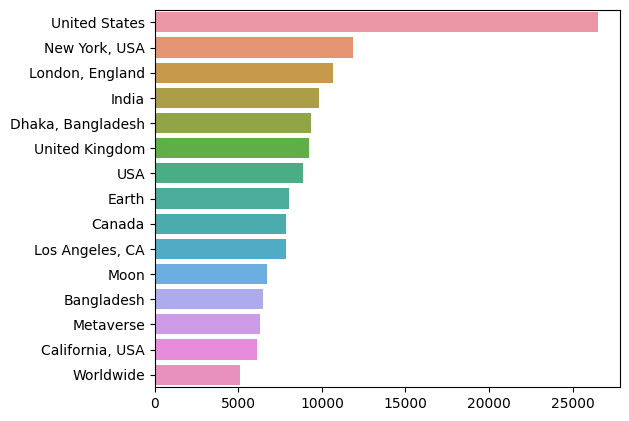

In [23]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

sns.barplot(y=result_source_location.index, x=result_source_location.values)

In [24]:
#df_new_.groupby(['user_location', 'source']).size().to_frame('total').reset_index()
df_new_['counts'] = df_new_['user_location'].map(df_new_['user_location'].value_counts())

In [25]:
df_new3 = (df_new_[(df_new_['counts'] >= 5000) & (df_new_['counts'] < 977467)]).reset_index(drop=True)
df_new3

user_location                                   user_description  \
0       London, England  IM Academy : The best #forex, #SelfEducation, ...   
1                  Moon                                           #Bitcoin   
2         New York, USA                           #Bitcoin #Cryptocurrency   
3        United Kingdom  #FinTechUK | Doing our bit to make the UK a gl...   
4       California, USA  It's me Esteeb. Crypto Fan. $BTC and $CEL lead...   
...                 ...                                                ...   
140663        Metaverse  #Blockchain | #Crypto | #Invest | #Trading | #...   
140664   United Kingdom                                                NaN   
140665  London, England  Crypto, NFTs, Financial Services Tech Head Hun...   
140666   United Kingdom  $Nano $XNO P2P digital gold currency and hardm...   
140667    United States  Follow me I well follow back 100% üíØüíØüíØüíØüíØüíØüíØüíØüíØüíØüíØüíØ...   

       user_created  user_followers user_verified        date  \
0        2014-11-10           128.0         False  2021-02-10   
1        2010-07-12             4.0         False  2021-02-10   
2        2019-10-05           394.0         False  2021-02-10   
3        2015-09-07          1950.0         False  2021-02-10   
4        2011-11-15           842.0         False  2021-02-10   
...             ...             ...           ...         ...   
140663   2021-06-21           147.0         False  2022-03-14   
140664   2019-06-13          4999.0         False  2022-03-14   
140665   2021-09-21          2656.0         False  2022-03-14   
140666   2012-01-09          5424.0         False  2022-03-14   
140667   2016-10-31          3367.0         False  2022-03-14   

                                                     text  \
0       Guys evening, I have read this article about B...   
1       Buy #Bitcoin with 5% LIFETIME cashback on fees...   
2       My opinion is the clients - either Migros Swit...   
3       2,292.2542¬†of #BTC¬†was transferred today from ...   
4       ü§ù Follow me on @betfury_io. Let's hunt for Bit...   
...                                                   ...   
140663  #MEXC Staking allows you to stake and earn yie...   
140664  @paddi_hansen Great news, thanks for the updat...   
140665  ECON a committee of the European Parliament, h...   
140666  @KanyeRespecter @DigiEconomist @ncweaver What ...   
140667  This project will go much further in the futur...   

                     source  counts  
0           Twitter Web App   10642  
1           Twitter Web App    6737  
2        Twitter for iPhone   11887  
3       Twitter for Android    9208  
4           Twitter Web App    6132  
...                     ...     ...  
140663      Twitter Web App    6299  
140664  Twitter for Android    9208  
140665   Twitter for iPhone   10642  
140666  Twitter for Android    9208  
140667      Twitter Web App   26493  

[140668 rows x 9 columns]

In [26]:
df_new3['user_location'].value_counts()

United States        26493
New York, USA        11887
London, England      10642
India                 9826
Dhaka, Bangladesh     9355
United Kingdom        9208
USA                   8843
Earth                 8020
Canada                7842
Los Angeles, CA       7824
Moon                  6737
Bangladesh            6458
Metaverse             6299
California, USA       6132
Worldwide             5102
Name: user_location, dtype: int64

In [27]:
result__location_source = df_new3.groupby(['user_location', 'source']).size().to_frame('total').reset_index()

#### Nessa Imagem, podemos visualizar, os paises em que falaram sobre bitcoin (Android, Web App ou IPhone). Dessa forma, os USA teve uma maior men√ß√£o de bitcoin no Twitter com o uso do Twitter em Android, Web App e Iphone. Pode-se destacar que o pa√≠s Bangladesh teve um grande men√ß√£o pelo o uso de celulares Android.

<AxesSubplot:xlabel='total', ylabel='user_location'>

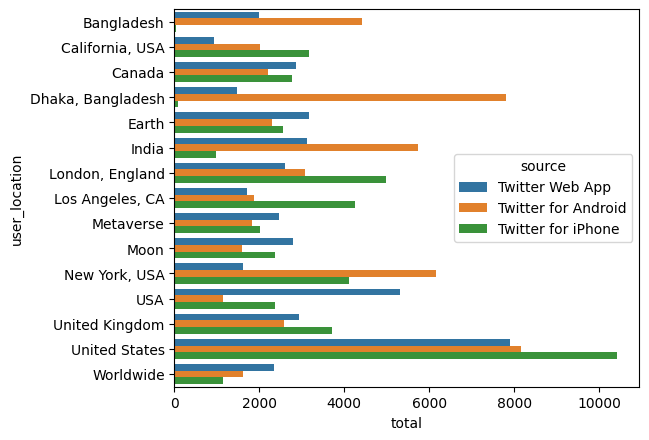

In [28]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

sns.barplot(x='total', y='user_location', hue='source', data=result__location_source)

In [29]:
result_source_date = df_new3.groupby(['source', 'user_created']).size().to_frame('total_source_date').reset_index()

In [30]:
result_source_date.total_source_date.max()

2378

In [33]:
result_source_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10366 entries, 0 to 10365
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   source             10366 non-null  object        
 1   user_created       10366 non-null  datetime64[ns]
 2   total_source_date  10366 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 243.1+ KB


In [34]:
result_source_date['user_created'] = pd.to_datetime(result_source_date['user_created'], errors='ignore')

In [128]:
#result_source_date[result_source_date['user_created'].dt.year == '2021']
#result_source_date[result_source_date['user_created'].dt.year == '2021']
#result_source_date['user_created'].loc['2016' : '2022']
import datetime

#result_source_date[result_source_date['user_created'] > datetime.datetime(2017,1,1)]
result_source_date[(result_source_date.source == 'Twitter Web App') & (result_source_date.user_created > datetime.datetime(2020,1,1))].user_created

2715   2020-01-03
2716   2020-01-04
2717   2020-01-05
2718   2020-01-06
2719   2020-01-07
          ...    
3485   2022-03-13
3486   2022-03-14
3487   2022-03-15
3488   2022-03-17
3489   2022-03-18
Name: user_created, Length: 775, dtype: datetime64[ns]

#### Durante o periodo do tempo. No ano de 2021 e no in√≠cio de 2022 teve um grande aumento de men√ß√£o de bitcoin no Twitter. Pode-se destacar, em que no ano de 2022, no in√≠cio, Twitter com Android teve um grande n√∫mero de men√ß√µes.

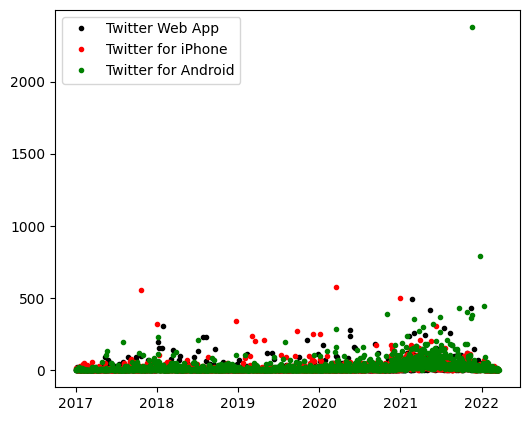

In [133]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

plt.plot(result_source_date[(result_source_date.source == 'Twitter Web App') & (result_source_date.user_created > datetime.datetime(2017,1,1))].user_created, result_source_date[(result_source_date.source == 'Twitter Web App') & (result_source_date.user_created > datetime.datetime(2017,1,1))].total_source_date, '.k', label='Twitter Web App')
plt.plot(result_source_date[(result_source_date.source == 'Twitter for iPhone') & (result_source_date.user_created > datetime.datetime(2017,1,1))].user_created, result_source_date[(result_source_date.source == 'Twitter for iPhone') & (result_source_date.user_created > datetime.datetime(2017,1,1))].total_source_date, '.r', label='Twitter for iPhone')
plt.plot(result_source_date[(result_source_date.source == 'Twitter for Android') & (result_source_date.user_created > datetime.datetime(2017,1,1))].user_created, result_source_date[(result_source_date.source == 'Twitter for Android') & (result_source_date.user_created > datetime.datetime(2017,1,1))].total_source_date, '.g', label='Twitter for Android')
#plt.plot(result_source_date[result_source_date.source == 'Twitter for iPhone'].user_created, result_source_date[result_source_date.source == 'Twitter for iPhone'].total_source_date, '.r', label='Twitter for Iphone')
#plt.plot(result_source_date[result_source_date.source == 'Twitter for Android'].user_created, result_source_date[result_source_date.source == 'Twitter for Android'].total_source_date, '.b', label='Twitter for Android')
plt.legend(loc='best')
plt.show()

## 2 Parte

### Classifica√ß√£o Positivo e Negativo

In [38]:
from tqdm import tqdm

df2_ = df

df2_.dropna(subset=['hashtags'], inplace=True)

df2_ = df2_[['text']] 
df2_.columns = ['tweets']
df2_.head()

tweets
0  Blue Ridge Bank shares halted by NYSE after #b...
1  üòé Today, that's this #Thursday, we will do a "...
3  $BTC A big chance in a billion! Price: \487264...
4  This network is secured by 9 508 nodes as of t...
5  üíπ Trade #Crypto on #Binance \n\nüìå Enjoy #Cashb...

In [174]:
!pip install -U nltk

#### Download das bibliotecas de texto, para realizar a etapa de pre-processamento

In [40]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download()
nltk.download('popular', halt_on_error=False)
stop_words = nltk.corpus.stopwords.words(['english'])


print(stop_words)

[nltk_data] Downloading package wordnet to C:\Users\Maicon
[nltk_data]     Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Maicon
[nltk_data]     Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Maicon
[nltk_data]     Santos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Maicon
[nltk_data]    |     Santos\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Maicon
[nltk_data]    |     Santos\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to C:\Users\Maicon
[nltk_data]    |     Sant

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Maicon
[nltk_data]    |     Santos\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection popular


In [41]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
  #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

#### Foi realizado uma limpeza nos textos, removendo todo tipo de emojis, palavras com caracteres especiais.

In [42]:
#import nltk
#nltk.download()

df2_['cleaned_tweets'] = df2_['tweets'].apply(cleaning)
df2_.head()

tweets  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  üòé Today, that's this #Thursday, we will do a "...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   
5  üíπ Trade #Crypto on #Binance \n\nüìå Enjoy #Cashb...   

                                      cleaned_tweets  
0  Blue Ridge Bank share halted NYSE ATM announce...  
1                             Today Take friend expe  
3                     BTC A big chance billion Price  
4  This network secured node today Soon biggest b...  
5                  Trade Enjoy Trading fee Sign link

In [43]:
def getSub(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPol(tweet):
    return TextBlob(tweet).sentiment.polarity

#### Foi aplicado um algoritmo para identificar a polaridade dos textos

In [44]:
df2_['sub'] = df2_['cleaned_tweets'].apply(getSub)
df2_['pol'] = df2_['cleaned_tweets'].apply(getPol)
df2_.head()

tweets  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  üòé Today, that's this #Thursday, we will do a "...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   
5  üíπ Trade #Crypto on #Binance \n\nüìå Enjoy #Cashb...   

                                      cleaned_tweets  sub   pol  
0  Blue Ridge Bank share halted NYSE ATM announce...  0.1  0.00  
1                             Today Take friend expe  0.0  0.00  
3                     BTC A big chance billion Price  0.1  0.00  
4  This network secured node today Soon biggest b...  0.2 -0.25  
5                  Trade Enjoy Trading fee Sign link  0.5  0.40

#### Foi realizado uma verificaca√ß√£o e adicionado uma label, para identificar se √© positivo ou negativo, de acordo com o m√©todo anterior, se for menor que zero, aquele twitter √© negativo, se n√£o √© um twitter positivo.

In [45]:
def getSent(score):
    if score < 0:
        return 'negativo'
    else:
        return 'positivo'

In [46]:
df2_['sentimento'] = df2_['pol'].apply(getSent)
df2_.head()

tweets  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  üòé Today, that's this #Thursday, we will do a "...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   
5  üíπ Trade #Crypto on #Binance \n\nüìå Enjoy #Cashb...   

                                      cleaned_tweets  sub   pol sentimento  
0  Blue Ridge Bank share halted NYSE ATM announce...  0.1  0.00   positivo  
1                             Today Take friend expe  0.0  0.00   positivo  
3                     BTC A big chance billion Price  0.1  0.00   positivo  
4  This network secured node today Soon biggest b...  0.2 -0.25   negativo  
5                  Trade Enjoy Trading fee Sign link  0.5  0.40   positivo

In [47]:
# Encode Categorical Variable
X = df2_['cleaned_tweets']
y = pd.get_dummies(df2_['sentimento']).values
num_classes = df2_['sentimento'].nunique()

In [50]:
X

0          Blue Ridge Bank share halted NYSE ATM announce...
1                                     Today Take friend expe
3                             BTC A big chance billion Price
4          This network secured node today Soon biggest b...
5                          Trade Enjoy Trading fee Sign link
                                 ...                        
2573250    This tell plenty DO NOT hold paper Take physic...
2573251        TEwL iCv Xyn Vr C CHMqdS ixA QWvc help dollar
2573252    LOSSER LIST TODAY USDT PROFIT To get type sign...
2573253                                       I crazy person
2573254    This coin solid bone new height let go new pea...
Name: cleaned_tweets, Length: 2555992, dtype: object

In [49]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

#### Foi realizado a separa√ß√£o dos dados, em treino e teste com o m√©todo train_test_split, separando 20% dos dados para teste.

In [51]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2044793,) (511199,) (2044793, 2) (511199, 2)


#### Foi realizado a etapa de pre-processamento, do texto para numeros.

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [56]:
from keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(2044793, 30) (511199, 30)


In [57]:
X_train

array([[    0,     0,     0, ...,     4,     3,    29],
       [    0,     0,     0, ..., 12981,   295,   789],
       [    0,     0,     0, ...,  5564,   155,   526],
       ...,
       [    0,     0,     0, ...,    71,    31,    60],
       [    0,     0,     0, ...,     0,  1360,   207],
       [    0,     0,     0, ...,     0,     7,    90]])

In [106]:
#history = model.fit(X_train, np.argmax(y_train,axis=1).reshape(-1, 1), epochs=50, verbose=1)
#y_train
X_train.shape, np.argmax(y_train,axis=1).reshape(-1, 1).shape

((2044793, 30), (2044793, 1))

In [107]:
from tensorflow.keras.layers import LeakyReLU
from keras.regularizers import l2

        #layers.Dense(100, activation="relu", input_shape=[X_train.shape[1]]),
        #layers.Dense(100, activation='relu', input_shape=[X_train.shape[1]]),
        #layers.Dense(100, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),

np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
def build_model(X_train, dropout=0.0):
    #if dropout == 0.0:
    model = keras.Sequential([
        layers.Dropout(dropout, input_shape=[X_train.shape[1]]),
        #layers.Dense(400, activation="relu"),
        #layers.Dense(300, activation="relu"),
        #layers.Dense(200, activation="relu"),
        layers.Dense(100, activation="softmax", input_shape=[X_train.shape[1]]),
        layers.Dense(80, activation='softmax'),
        layers.Dense(60, activation='softmax'),
        layers.Dense(40, activation='softmax'),
        layers.Dense(20, activation='softmax'),
        layers.Dense(6, activation='softmax'),
        layers.Dense(1)
      ])
    
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    #optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.90, epsilon=1e-07)
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(
        loss='mse',
        #loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
    
    return model 


rna_01 = build_model(X_train, 0)
rna_01.fit(X_train, y_train, epochs=5, verbose=1)

%time

Epoch 1/5
63900/63900 [==============================] - 67s 1ms/step - loss: 0.2510 - accuracy: 0.5000
Epoch 2/5
63900/63900 [==============================] - 68s 1ms/step - loss: 0.2500 - accuracy: 0.5000 0s -
Epoch 3/5
63900/63900 [==============================] - 68s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 4/5
63900/63900 [==============================] - 68s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 5/5
63900/63900 [==============================] - 67s 1ms/step - loss: 0.2500 - accuracy: 0.5000
Wall time: 0 ns


#### Foi aplicado um algoritmo de rede neural, em que nesse algoritmo, foi aplicado 5 ep√≥cas, para obter uma acur√°ria de 10.7%, dessa forma, com essa configura√ß√£o, o algoritmo n√£o apresentou um bom desempenho.

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


y_pred =  np.argmax(rna_01.predict(X_test), axis=1)
print('Acc:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100))
#print(classification_report(np.argmax(y_test,axis=1), y_pred))

Acc:	10.7%


#### Desse modo, o algoritmo s√≥ encontrou twitter, negativo, n√£o tendo uma boa generaliza√ß√£o com essa configura√ß√£o

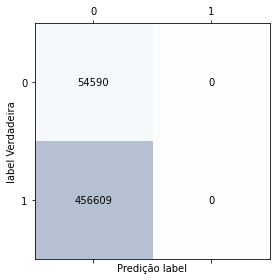

In [125]:
#confusion matrix
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        plt.xlabel('Predi√ß√£o label')
        plt.ylabel('label Verdadeira')
        plt.tight_layout()

In [109]:
np.argmax(y_train,axis=1).reshape(-1, 1)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [110]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=6, n_estimators=1000)
model.fit(X_train, np.argmax(y_train,axis=1).reshape(-1, 1))

[14:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Foi aplicado tamb√©m o algoritmo de XGBoost, para obter a classifica√ß√£o de twitter positivo e negativo, dessa forma, esse algoritmo obteve uma boa classifica√ß√£o de 94.5%. Assim, o algoritmo teve uma boa generaliza√ß√£o, sabendo dos twitter positivo e negativo. Conforme apresentado na figura da matriz de confus√£o.

In [122]:
y_pred_xboost =  model.predict(X_test)
print('Acc:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1), y_pred_xboost)*100))

Acc:	94.5%


In [119]:
#np.argmax(model.predict(X_test), axis=0)
model.predict(X_test).shape

(511199,)

In [121]:
np.argmax(y_test, axis=1)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Com a matriz de confus√£o, teve uma boa resposta com o algoritmo XGBoost, e podemos perceber que o twitter, foi mencionado o bitcoin de forma positiva, com 20% dos dados para teste.

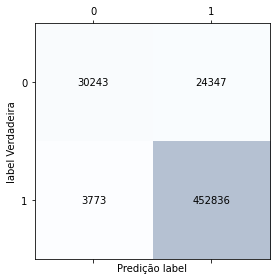

In [126]:
#confusion matrix
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_xboost)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        plt.xlabel('Predi√ß√£o label')
        plt.ylabel('label Verdadeira')
        plt.tight_layout()